In [1]:
import numpy as np
import pandas as pd
import pyodbc
import sys
import warnings
warnings.filterwarnings('ignore')

In [2]:
conn = pyodbc.connect(r'Driver=SQL server;Server=.\SQLEXPRESS;Database=AdventureWorks2019;Trusted_Connection=yes;')
cursor = conn.cursor()

In [3]:
data = pd.read_sql_query(
'''SELECT * FROM kaggle.carpricing''',conn
)

data_df = pd.DataFrame(data)

In [4]:
data_df.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,Hero Passion X pro,2016.0,12417.55,33217.0,Petrol,Individual,Manual,0.0,11717.50
1,xcent,2017.0,10633.13,12905.0,Petrol,Dealer,Manual,0.0,9931.75
2,verna,2015.0,10881.40,62053.0,Diesel,Dealer,Manual,0.0,10180.25
3,ertiga,2016.0,11107.79,43897.0,Diesel,Dealer,Manual,0.0,10404.75
4,jazz,2016.0,10316.40,4108.0,Petrol,Dealer,Manual,0.0,9614.00


In [5]:
import datasist as ds

In [6]:
ds.structdata.describe(data_df)

First five data points


,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,Hero Passion X pro,2016.0,12417.55,33217.0,Petrol,Individual,Manual,0.0,11717.50
1,xcent,2017.0,10633.13,12905.0,Petrol,Dealer,Manual,0.0,9931.75
2,verna,2015.0,10881.40,62053.0,Diesel,Dealer,Manual,0.0,10180.25
3,ertiga,2016.0,11107.79,43897.0,Diesel,Dealer,Manual,0.0,10404.75
4,jazz,2016.0,10316.40,4108.0,Petrol,Dealer,Manual,0.0,9614.00




Random five data points


,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
13092,Honda Activa 4G,2017.0,12553.51,6353.0,Petrol,Individual,Automatic,0.0,11853.45
45540,i20,2011.0,9578.79,32976.0,Petrol,Dealer,Manual,0.0,8874.90
11570,jazz,2016.0,11645.70,17440.0,Petrol,Dealer,Manual,0.0,10944.60
45524,Activa 3g,2016.0,12061.54,2361.0,Petrol,Individual,Automatic,0.0,11361.45
3169,ignis,2017.0,11253.71,3448.0,Petrol,Dealer,Manual,0.0,10552.90




Last five data points


,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
99995,verna,2014.0,9104.40,45973.0,Petrol,Dealer,Manual,0.0,8401.45
99996,innova,2015.0,10343.46,38130.0,Diesel,Dealer,Manual,0.0,9642.50
99997,city,2015.0,10965.00,19583.0,Petrol,Dealer,Manual,0.0,10261.70
99998,city,2015.0,12410.09,62273.0,Diesel,Dealer,Manual,0.0,11705.55
99999,verna,2012.0,8775.40,36666.0,Petrol,Dealer,Manual,0.0,8070.50




Shape of  data set: (100000, 9)


Size of  data set: 900000


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
Car_Name,object
Year,float64
Present_Price,float64
Kms_Driven,float64
Fuel_Type,object
Seller_Type,object
Transmission,object
Owner,float64
Selling_Price,float64




Numerical Features in Data set
['Year', 'Present_Price', 'Kms_Driven', 'Owner', 'Selling_Price']


Categorical Features in Data set


['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']



Statistical Description of Columns


,Year,Present_Price,Kms_Driven,Owner,Selling_Price
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2014.059300,10454.815579,35544.731010,0.036080,9752.087633
std,2.592811,1497.176036,35908.164469,0.213913,1498.468367
min,2003.000000,3405.280000,606.000000,0.000000,2703.350000
25%,2013.000000,9406.007500,15760.000000,0.000000,8703.250000
50%,2015.000000,10628.705000,30595.500000,0.000000,9926.700000
75%,2016.000000,11639.782500,46476.000000,0.000000,10938.120000
max,2018.000000,12731.230000,502479.000000,3.000000,12028.000000




Description of Categorical Features


,count,unique,top,freq
Car_Name,100000,98,city,8919
Fuel_Type,100000,3,Petrol,78995
Seller_Type,100000,2,Dealer,65615
Transmission,100000,2,Manual,86541




Unique class Count of Categorical features


,Feature,Unique Count
0,Car_Name,98
1,Fuel_Type,3
2,Seller_Type,2
3,Transmission,2




Missing Values in Data


,features,missing_counts,missing_percent
0,Car_Name,0,0.0
1,Year,0,0.0
2,Present_Price,0,0.0
3,Kms_Driven,0,0.0
4,Fuel_Type,0,0.0
5,Seller_Type,0,0.0
6,Transmission,0,0.0
7,Owner,0,0.0
8,Selling_Price,0,0.0


Unique Values in Car_Name is too large to plot




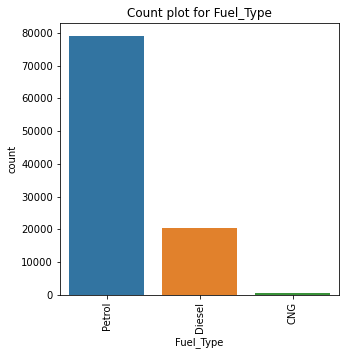

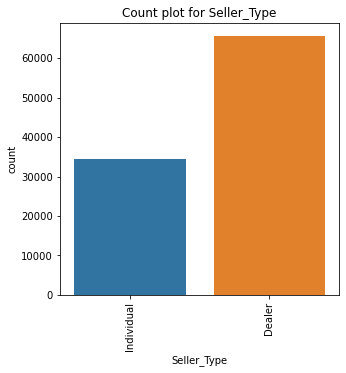

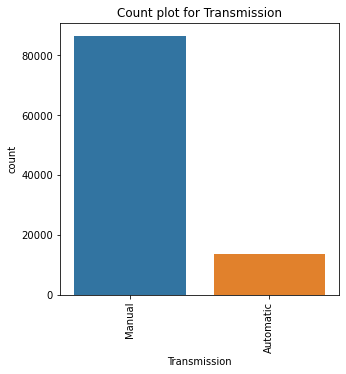

In [7]:
ds.visualizations.countplot(data_df)

Unique Values in Car_Name is too large to plot




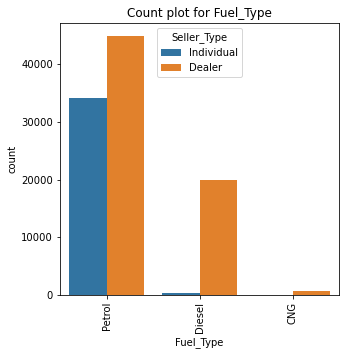

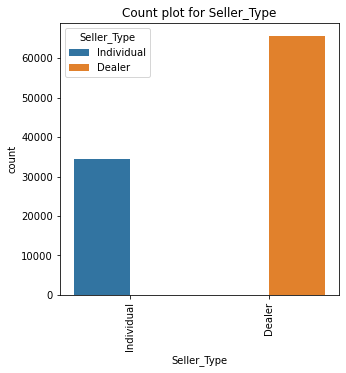

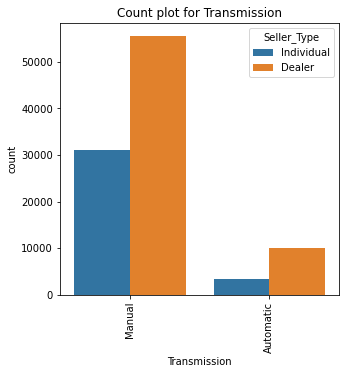

In [8]:
ds.visualizations.countplot(data_df, separate_by='Seller_Type')

In [9]:
data_df = ds.feature_engineering.fill_missing_cats(data_df)
data_df = ds.feature_engineering.fill_missing_num(data_df)

In [10]:
data_df['Year'] = 2021 - data_df['Year']

In [11]:
data_df.head(5)

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,Hero Passion X pro,5.0,12417.55,33217.0,Petrol,Individual,Manual,0.0,11717.50
1,xcent,4.0,10633.13,12905.0,Petrol,Dealer,Manual,0.0,9931.75
2,verna,6.0,10881.40,62053.0,Diesel,Dealer,Manual,0.0,10180.25
3,ertiga,5.0,11107.79,43897.0,Diesel,Dealer,Manual,0.0,10404.75
4,jazz,5.0,10316.40,4108.0,Petrol,Dealer,Manual,0.0,9614.00


In [12]:
data_df.columns

Index(['Car_Name', 'Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Selling_Price'],
      dtype='object')

In [13]:
data_df = data_df[['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Selling_Price']]

data_df.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,5.0,12417.55,33217.0,Petrol,Individual,Manual,0.0,11717.50
1,4.0,10633.13,12905.0,Petrol,Dealer,Manual,0.0,9931.75
2,6.0,10881.40,62053.0,Diesel,Dealer,Manual,0.0,10180.25
3,5.0,11107.79,43897.0,Diesel,Dealer,Manual,0.0,10404.75
4,5.0,10316.40,4108.0,Petrol,Dealer,Manual,0.0,9614.00


In [14]:
data_df = pd.get_dummies(data_df, drop_first = True)

In [15]:
data_df.head()

,Year,Present_Price,Kms_Driven,Owner,Selling_Price,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.0,12417.55,33217.0,0.0,11717.50,0,1,1,1
1,4.0,10633.13,12905.0,0.0,9931.75,0,1,0,1
2,6.0,10881.40,62053.0,0.0,10180.25,1,0,0,1
3,5.0,11107.79,43897.0,0.0,10404.75,1,0,0,1
4,5.0,10316.40,4108.0,0.0,9614.00,0,1,0,1


In [16]:
data_df.dtypes

Year                      float64
Present_Price             float64
Kms_Driven                float64
Owner                     float64
Selling_Price             float64
Fuel_Type_Diesel            uint8
Fuel_Type_Petrol            uint8
Seller_Type_Individual      uint8
Transmission_Manual         uint8
dtype: object

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,10]

<AxesSubplot:>

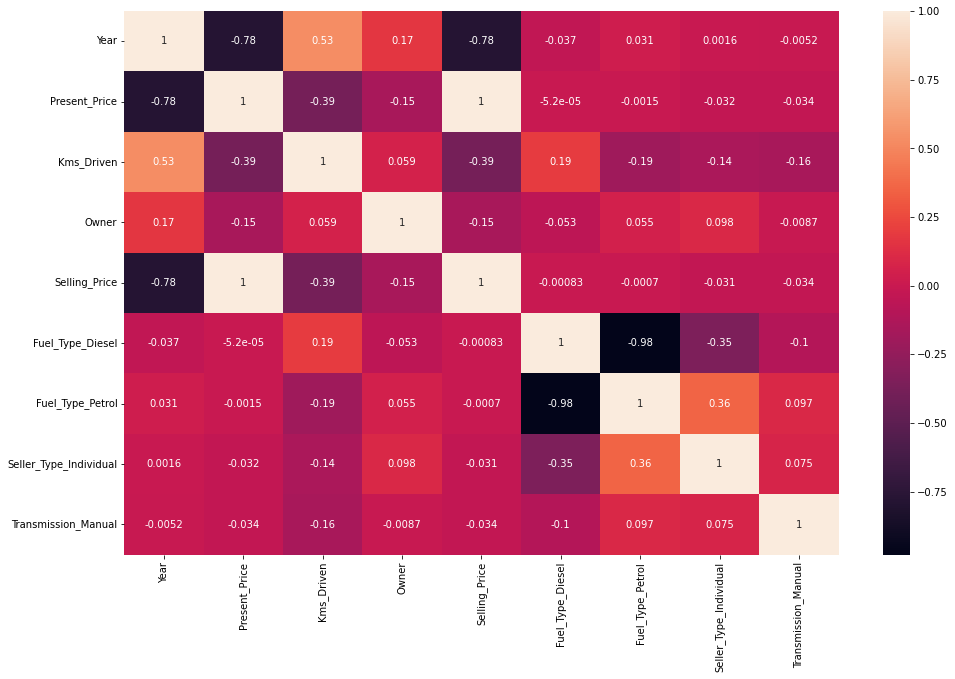

In [18]:
sns.heatmap(data_df.corr(), annot = True)

In [19]:
data_df.columns

Index(['Year', 'Present_Price', 'Kms_Driven', 'Owner', 'Selling_Price',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

In [20]:
data_df1 = data_df[['Year', 'Kms_Driven', 'Owner', 'Selling_Price',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual']]

In [21]:
X= data_df1.drop('Selling_Price', axis = 1)
y= data_df1.Selling_Price

In [22]:
print(X)

       Year  Kms_Driven  Owner  Fuel_Type_Diesel  Fuel_Type_Petrol  \
0       5.0     33217.0    0.0                 0                 1   
1       4.0     12905.0    0.0                 0                 1   
2       6.0     62053.0    0.0                 1                 0   
3       5.0     43897.0    0.0                 1                 0   
4       5.0      4108.0    0.0                 0                 1   
...     ...         ...    ...               ...               ...   
99995   7.0     45973.0    0.0                 0                 1   
99996   6.0     38130.0    0.0                 1                 0   
99997   6.0     19583.0    0.0                 0                 1   
99998   6.0     62273.0    0.0                 1                 0   
99999   9.0     36666.0    0.0                 0                 1   

       Seller_Type_Individual  Transmission_Manual  
0                           1                    1  
1                           0                    1  


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [24]:
print(f'Train shape : {X_train.shape}')
print(f'Test shape : {X_test.shape}')

Train shape : (70000, 7)
Test shape : (30000, 7)


In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
model = RandomForestRegressor(random_state = 0)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [27]:
predictions = model.predict(X_test)
print(predictions)

[10365.58      11177.9432987 11217.815     ... 11143.894      8679.148
 10695.0773   ]


In [28]:
model.predict([[2005, 3000, 0, 0, 1, 1, 1]])

array([2768.642])

In [29]:
from sklearn import metrics

In [30]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 375.14213567291023


In [31]:
import pickle

In [32]:
file = open("car_price_prediction.pkl","wb")
pickle.dump(model, file)
file.close()

In [33]:
import os
os.stat('car_price_prediction.pkl').st_size

536109838

In [34]:
with open('car_price_prediction.pkl', 'rb') as f:
    model = pickle.load(f)

<AxesSubplot:>

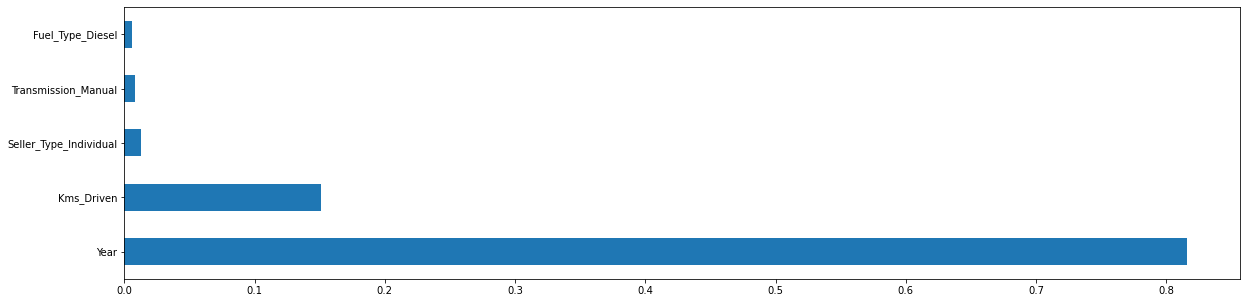

In [35]:
#feature importance graph
feat_importance = pd.Series(model.feature_importances_,index = X_train.columns)
feat_importance.nlargest(5).plot(kind= 'barh', figsize=(20,5))